# Train & Test Dataset Analysis

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [ ]:
# Define the paths to the train and test datasets
train_data_dir = "./FinalDataset/train"
test_data_dir = "./FinalDataset/test"

# Initialize lists to store data
data = []

# Loop through the train and test datasets
for dataset_dir in [train_data_dir, test_data_dir]:
    for label in os.listdir(dataset_dir):
        label_dir = os.path.join(dataset_dir, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                if filename.endswith(".jpg"):  # Ensure it's an image file
                    img_path = os.path.join(label_dir, filename)
                    data.append((img_path, label, dataset_dir))

# Create a DataFrame for analysis
df = pd.DataFrame(data, columns=["Image_Path", "Label", "Dataset"])

### Basic data analysis

In [9]:
# Basic data analysis
label_counts = df["Label"].value_counts()
total_images = len(df)

print("Number of Images:", total_images)
print("Number of Labels:", len(label_counts))
print("\nLabel Distribution:")
print(label_counts)

Number of Images: 12135
Number of Labels: 3

Label Distribution:
Label
Belly Rot            4045
Fresh Cucumber       4045
Pythium Fruit Rot    4045
Name: count, dtype: int64


### Training and Testing Data Distribution

In [10]:
# Count the number of train and test images
train_image_count = len(df[df["Dataset"] == train_data_dir])
test_image_count = len(df[df["Dataset"] == test_data_dir])

print("Number of Train Images:", train_image_count)
print("Number of Test Images:", test_image_count)

# Calculate the percentages
train_percentage = (train_image_count / total_images) * 100
test_percentage = (test_image_count / total_images) * 100

print("\nPercentage of Train Images: {:.2f}%".format(train_percentage))
print("Percentage of Test Images: {:.2f}%".format(test_percentage))

Number of Train Images: 8493
Number of Test Images: 3642

Percentage of Train Images: 69.99%
Percentage of Test Images: 30.01%


### Plot label distribution

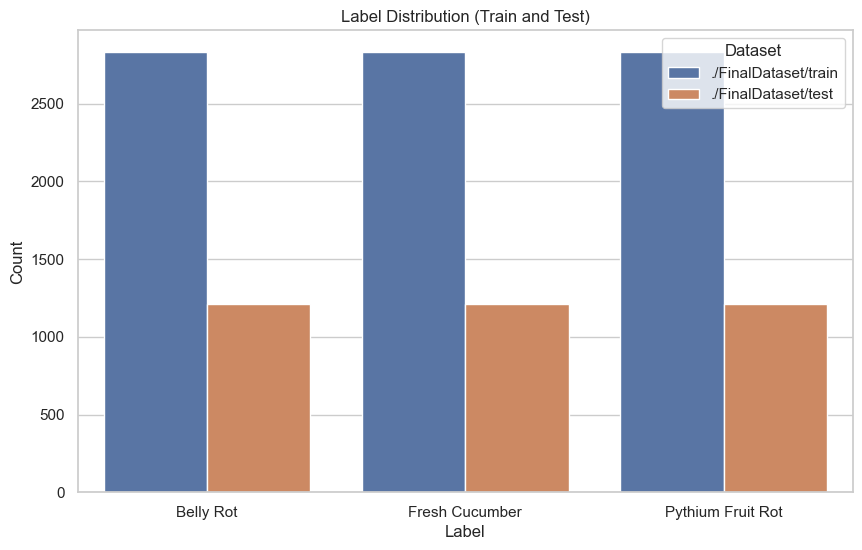

In [11]:
# Plot label distribution for train and test datasets
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=df, x="Label", hue="Dataset", order=label_counts.index)
plt.title("Label Distribution (Train and Test)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.legend(title="Dataset")
plt.show()